Préparer les fichiers txt, et faire des analyses préliminaires 

In [4]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = "../../data/halley/halley_txt/" # Path to the directory containing text files
files = sorted(os.listdir(path)) # trier les fichiers par ordre alphabétique
len(files)  # probably get rid of this

551

In [ ]:
#parcourir les fichiers pour extraire leurs dates ?? décénnie ? 
#dates, le jour même est important pour qquns, au moins la semaine mais bon 


chaine = 'KB_JB838_1887-12-22_01-00001'
type(chaine) # to check that it's a string, so we can def delete this later 

# la méthode split afin d'avoir la date/décénnie des documents 
chaine_split = chaine.split('_')
# chaine_split ,also don't think this is necessary to have twice
date = chaine_split[2] #cchercher le 3e élément
date_split = date.split('-')
year = date_split[0]
month = date_split[1]
day = date_split[2]
#I'm not actually sure that I'll need this for any sort of analysis yet, so I'm just going to leave it here for now knowing that it works

'22'

In [29]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

In [ ]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB427']} exemplaires de La Libre Belgique")
#faut modifier ceci pour tous les journaux qui traitent Halley 
#en vrai il ne faut pas faire tout ça hardcodé vue que c'est déjà dans le read me, mais pe interéssant pour une ananlyse éventuelle par journal etc 

Il y a 167 exemplaires du journal Le Soir et 24 exemplaires de La Libre Belgique


In [40]:
print(f"Il y a {count_decade['1830s']} fichiers pour la décennie 1930s")

Il y a 11 fichiers pour la décennie 1930s


Visualiser le nombre de journaux par décennie

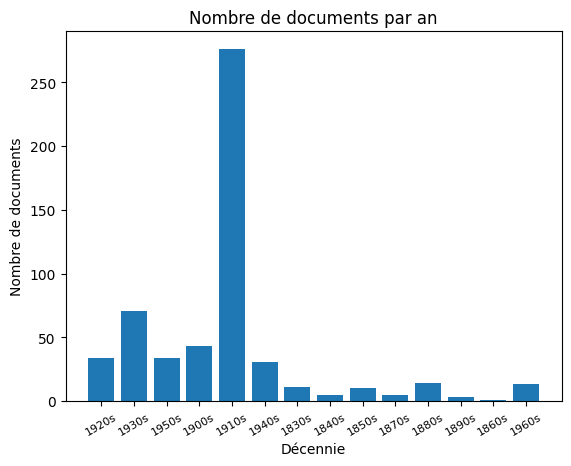

In [43]:
index = np.arange(len(count_decade))
plt.bar(index, count_decade.values())
plt.xlabel('Décennie')
plt.ylabel('Nombre de documents')
plt.xticks(index, count_decade.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par an')
plt.show()
#UMMM decade DOESN'T work , where is 1835? ok I think it just doesn't show years that have enough documents, so maybe I need to clean the data more?
# ok so decades almost works, and it's what I expected. Really bummer that 1985 isn't there but interesting that there's a spike in the 1930s but idk it might need more cleaning first, idk when I was supposed to do that lol 

Visualiser le nombre de journaux par mois en 1910

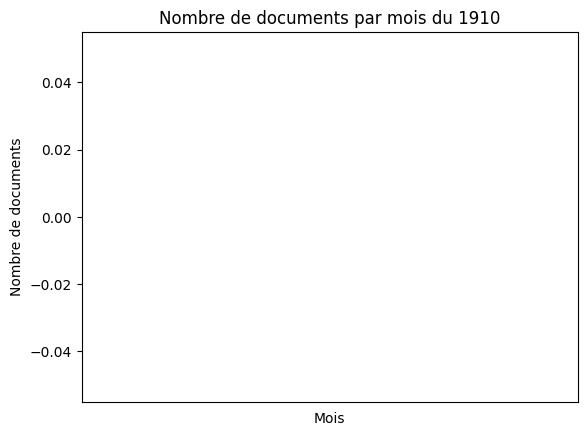

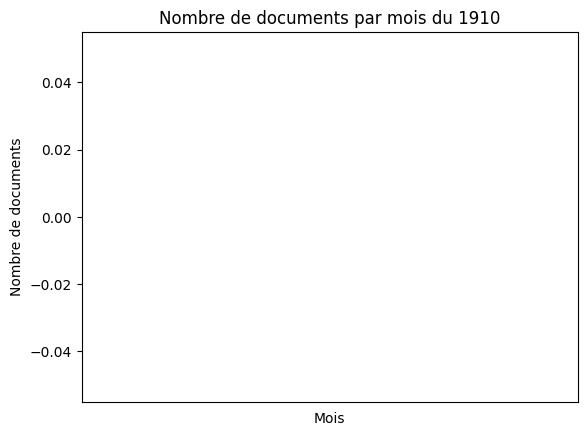

In [ ]:
passage_1910 = [str(year) for year in range(1909, 1911)]


for f in passage_1910:
    index = np.arange(len(count_month))
    plt.bar(index, count_month.values())
    plt.xlabel('Mois')
    plt.ylabel('Nombre de documents')
    plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
    plt.title('Nombre de documents par mois du 1910')
    plt.show()
